#  Inner Cauchy horizon of axisymmetric and stationary black holes with surrounding matter by Ansorg and Hennig
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 16, 2022

https://arxiv.org/abs/0903.5405

These are the field equations derived for metric 2 before transformation which are not listed.  Will go back and do the ones in paper

In [59]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [60]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [61]:
rho,zeta,phi,t,drho,dzeta,dphi,dt,a = symbols('rho zeta phi t drho dzeta dphi dt a')

In [62]:
U = Function('U')(rho,zeta)
U

In [63]:
k = Function('k')(rho,zeta)
k

In [64]:
a = Function('a')(rho,zeta)
a

In [65]:
variables = Matrix([rho,zeta,phi,t])
variables

⎡ρ⎤
⎢ ⎥
⎢ζ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣t⎦

In [66]:
differentials = Matrix([drho,dzeta,dphi,dt])
differentials 

⎡drho ⎤
⎢     ⎥
⎢dzeta⎥
⎢     ⎥
⎢dphi ⎥
⎢     ⎥
⎣ dt  ⎦

In [67]:
lineElement = expand( exp(-2*U) * ( exp(2*k) * (drho**2 + dzeta**2) + rho**2 * dphi**2) - exp(2*U) * (dt + a * dphi)**2 ) 
lineElement

In [68]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ -2⋅U(ρ, ζ)  2⋅k(ρ, ζ)                                                                     
⎢ℯ          ⋅ℯ                     0                              0                         
⎢                                                                                           
⎢                         -2⋅U(ρ, ζ)  2⋅k(ρ, ζ)                                             
⎢          0             ℯ          ⋅ℯ                            0                         
⎢                                                                                           
⎢                                                 2  -2⋅U(ρ, ζ)    2        2⋅U(ρ, ζ)       
⎢          0                       0             ρ ⋅ℯ           - a (ρ, ζ)⋅ℯ           -a(ρ,
⎢                                                                                           
⎢                                                                  2⋅U(ρ, ζ)                
⎣          0                       0                     -a(ρ, ζ)⋅ℯ   

In [69]:
import sympy

In [70]:
m = sympy.Array(g)
m

⎡ -2⋅U(ρ, ζ)  2⋅k(ρ, ζ)                                                                     
⎢ℯ          ⋅ℯ                     0                              0                         
⎢                                                                                           
⎢                         -2⋅U(ρ, ζ)  2⋅k(ρ, ζ)                                             
⎢          0             ℯ          ⋅ℯ                            0                         
⎢                                                                                           
⎢                                                 2  -2⋅U(ρ, ζ)    2        2⋅U(ρ, ζ)       
⎢          0                       0             ρ ⋅ℯ           - a (ρ, ζ)⋅ℯ           -a(ρ,
⎢                                                                                           
⎢                                                                  2⋅U(ρ, ζ)                
⎣          0                       0                     -a(ρ, ζ)⋅ℯ   

In [71]:
from einsteinpy.symbolic import *

In [72]:
syms = sympy.symbols("rho zeta phi t")
rho,zeta,phi,t = syms

In [73]:
metric = MetricTensor(m,syms)

In [74]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡  ∂             ∂              ∂             ∂                                            
⎢⎢- ──(U(ρ, ζ)) + ──(k(ρ, ζ))  - ──(U(ρ, ζ)) + ──(k(ρ, ζ))                                  
⎢⎢  ∂ρ            ∂ρ             ∂ζ            ∂ζ                                           
⎢⎢                                                                                          
⎢⎢  ∂             ∂             ∂             ∂                                             
⎢⎢- ──(U(ρ, ζ)) + ──(k(ρ, ζ))   ──(U(ρ, ζ)) - ──(k(ρ, ζ))                                   
⎢⎢  ∂ζ            ∂ζ            ∂ρ            ∂ρ                      

In [75]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                 ∂         
⎢                 2     2              2              2              2            ──(U(ρ, ζ)
⎢    ⎛∂          ⎞     ∂              ∂              ∂              ∂             ∂ρ        
⎢- 2⋅⎜──(U(ρ, ζ))⎟  + ───(U(ρ, ζ)) + ───(U(ρ, ζ)) - ───(k(ρ, ζ)) - ───(k(ρ, ζ)) + ──────────
⎢    ⎝∂ρ         ⎠      2              2              2              2                 ρ    
⎢                     ∂ρ             ∂ζ             ∂ρ             ∂ζ                       
⎢                                                                                           
⎢                                                                                           
⎢                                                          ∂              4⋅U(ρ, ζ) ∂       
⎢                                                          ──(k(ρ, ζ))

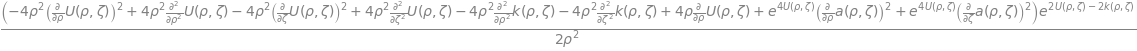

In [76]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [77]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                 ∂         
⎢                 2     2              2              2              2            ──(U(ρ, ζ)
⎢    ⎛∂          ⎞     ∂              ∂              ∂              ∂             ∂ρ        
⎢- 2⋅⎜──(U(ρ, ζ))⎟  + ───(U(ρ, ζ)) + ───(U(ρ, ζ)) - ───(k(ρ, ζ)) - ───(k(ρ, ζ)) + ──────────
⎢    ⎝∂ρ         ⎠      2              2              2              2                 ρ    
⎢                     ∂ρ             ∂ζ             ∂ρ             ∂ζ                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [78]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [79]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [80]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                 ∂         
⎢                 2     2              2              2              2            ──(U(ρ, ζ)
⎢    ⎛∂          ⎞     ∂              ∂              ∂              ∂             ∂ρ        
⎢- 2⋅⎜──(U(ρ, ζ))⎟  + ───(U(ρ, ζ)) + ───(U(ρ, ζ)) - ───(k(ρ, ζ)) - ───(k(ρ, ζ)) + ──────────
⎢    ⎝∂ρ         ⎠      2              2              2              2                 ρ    
⎢                     ∂ρ             ∂ζ             ∂ρ             ∂ζ                       
⎢                                                                                           
⎢                                                                                           
⎢                                                          ∂              4⋅U(ρ, ζ) ∂       
⎢                                                          ──(k(ρ, ζ))

In [81]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                       2   
⎢                                            ∂                   4⋅U(ρ, ζ) ⎛∂          ⎞    
⎢               2                    2   1.0⋅──(k(ρ, ζ))   0.25⋅ℯ         ⋅⎜──(a(ρ, ζ))⎟    
⎢  ⎛∂          ⎞        ⎛∂          ⎞        ∂ρ                            ⎝∂ρ         ⎠    
⎢- ⎜──(U(ρ, ζ))⎟  + 1.0⋅⎜──(U(ρ, ζ))⎟  + ─────────────── + ────────────────────────────── - 
⎢  ⎝∂ρ         ⎠        ⎝∂ζ         ⎠           ρ                         2                 
⎢                                                                        ρ                  
⎢                                                                                           
⎢                                                                                           
⎢                                                   ∂              4⋅U(ρ, ζ) ∂           ∂  
⎢                                                   ──(k(ρ, ζ))   ℯ   

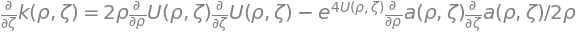

In [82]:
dkdzeta = Eq( diff(k,zeta),solve( Ric.tensor()[1,0], diff(k,zeta) )[0] ) 
dkdzeta

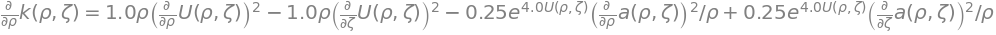

In [83]:
dkdrho = Eq(diff(k,rho),expand( solve( einsteinSimplified[0,0], diff(k,rho) )[0] ) ) 
dkdrho

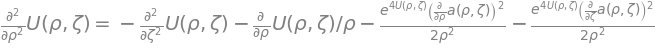

In [90]:
d2udrho2 = Eq(diff(U,rho,rho), expand(solve( ricciSimplified[3,3].args[1], diff(U,rho,rho) )[0]))
d2udrho2

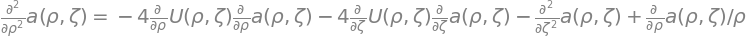

In [94]:
d2adrho2 = Eq(diff(a,rho,rho),solve(ricciSimplified[2,3].args[2].subs(d2udrho2.lhs,d2udrho2.rhs),diff(a,rho,rho) )[0] )
d2adrho2 

In [96]:
vacuumFieldEquations = Matrix([d2udrho2,d2adrho2,dkdzeta,dkdrho])
vacuumFieldEquations

⎡                                                                                  2        
⎢                                            ∂              4⋅U(ρ, ζ) ⎛∂          ⎞     4⋅U(
⎢              2                2            ──(U(ρ, ζ))   ℯ         ⋅⎜──(a(ρ, ζ))⎟    ℯ    
⎢             ∂                ∂             ∂ρ                       ⎝∂ρ         ⎠         
⎢            ───(U(ρ, ζ)) = - ───(U(ρ, ζ)) - ─────────── - ───────────────────────── - ─────
⎢              2                2                 ρ                      2                  
⎢            ∂ρ               ∂ζ                                      2⋅ρ                   
⎢                                                                                           
⎢                                                                                           
⎢              2                                                                        2   
⎢             ∂                 ∂           ∂               ∂         